In [31]:
!pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/e4/14/d795bb156f8cc10eb1dcfe1332b7dbb8405b634688980aa9be8f885cc888/tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata (3.5 kB)
  Obtaining dependency information for tensorflow-intel==2.16.1 from https://files.pythonhosted.org/packages/e0/36/6278e4e7e69a90c00e0f82944d8f2713dd85a69d1add455d9e50446837ab/tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl.metadata (5.0 kB)
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/package

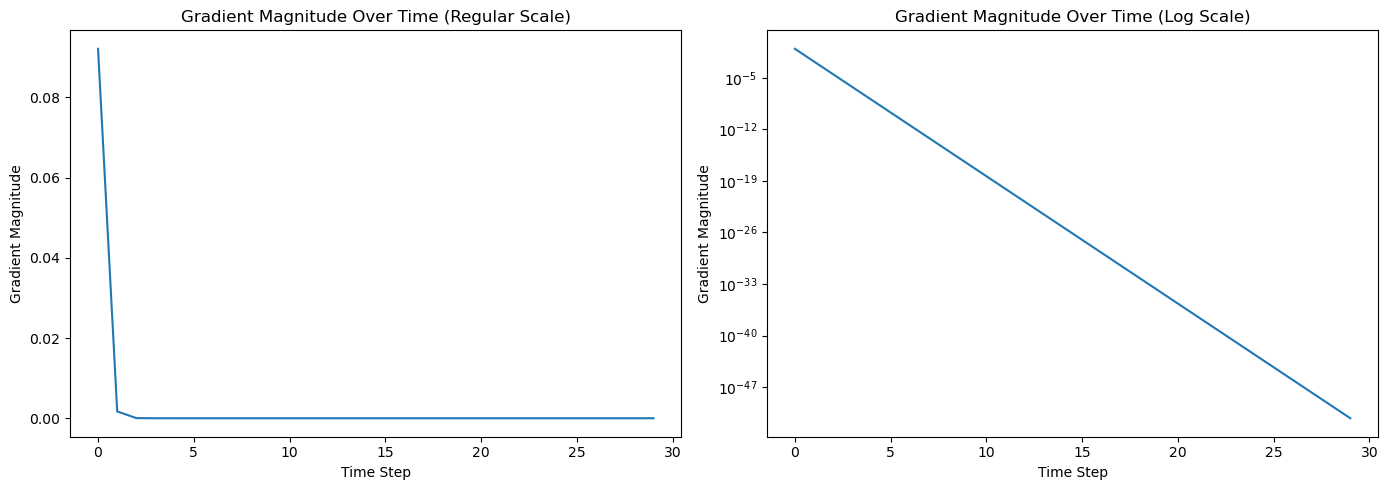

In [27]:
import numpy as np
import matplotlib.pyplot as plt
def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

sequence_length = 30  
h = np.random.normal(0, 0.1, size=(1, 1))  # 초기 은닉 상태
W = np.random.normal(0, 0.1, size=(1, 1))  # 은닉 상태 가중치
U = np.random.normal(0, 0.1, size=(1, 1))  # 입력 가중치
b = np.zeros((1, 1))  # 편향
x = np.random.normal(0, 0.1, size=(1, 1))  #     입력

dh_next = np.random.normal(0, 0.1, size=(1, 1))

gradients = []

# 역전파 시뮬레이션 시작
for t in range(sequence_length):
    z = np.dot(W, h) + np.dot(U, x) + b
    h = tanh(z)
    dz = dh_next * tanh_derivative(z)
    dW = np.dot(dz, h.T)
    dU = np.dot(dz, x.T)
    db = dz
    dh_next = np.dot(W.T, dz)  # 다음 타임 스텝을 위한 그래디언트 업데이트
    gradients.append(np.linalg.norm(dW) + np.linalg.norm(dU) + np.linalg.norm(db))

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Regular scale plot
axes[0].plot([np.linalg.norm(grad) for grad in gradients])
axes[0].set_title('Gradient Magnitude Over Time (Regular Scale)')
axes[0].set_xlabel('Time Step')
axes[0].set_ylabel('Gradient Magnitude')

# Log scale plot
axes[1].plot([np.linalg.norm(grad) for grad in gradients])
axes[1].set_yscale('log')
axes[1].set_title('Gradient Magnitude Over Time (Log Scale)')
axes[1].set_xlabel('Time Step')
axes[1].set_ylabel('Gradient Magnitude')

plt.tight_layout()
plt.show()


In [28]:
print([grad for grad in gradients])

[0.09210120587827296, 0.001707917254452837, 3.1704262720977704e-05, 5.885185354229455e-07, 1.0924530657565647e-08, 2.0278948259830245e-10, 3.764333274039713e-12, 6.987642956848708e-14, 1.2970996598290114e-15, 2.407775465802129e-17, 4.469496734339512e-19, 8.296621234827894e-21, 1.5400822062434994e-22, 2.8588182283544325e-24, 5.306756762488941e-26, 9.850807252069424e-28, 1.8285820862064764e-29, 3.3943537422202562e-31, 6.300858689492642e-33, 1.1696135182123512e-34, 2.1711259518743907e-36, 4.0302098304293525e-38, 7.481183329445596e-40, 1.3887143936327558e-41, 2.5778377325578904e-43, 4.7851793038709836e-45, 8.882615333384245e-47, 1.6488589068552944e-48, 3.0607378487932426e-50, 5.681575385308358e-52]


In [64]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense
from tensorflow.keras.optimizers import Adam

# 데이터 생성
data = np.array([0 for i in range(1000)] + [1, 0.5, 0.7, 0.3, 0.4, 0.6, 0.6, 1, 0.5, 0.8, 0.7, 0.6, 0.2, 0.5, 0])
data2 = np.array([1 for i in range(1000)] + [1, 0.5, 0.7, 0.3, 0.4, 0.6, 0.6, 1, 0.5, 0.8, 0.7, 0.6, 0.2, 0.5, 1])

# RNN 모델 정의
def build_rnn_model(input_shape):
    model = Sequential()
    model.add(SimpleRNN(50, input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')
    return model

# LSTM 모델 정의
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')
    return model

# RNN 및 LSTM 모델 학습 및 예측
for i, data_set in enumerate([data, data2], start=1):
    # 마지막 값 제외하고 모델 학습
    X_train = data_set[:-2].reshape(-1, 1, 1)
    y_train = data_set[1:-1].reshape(-1, 1)

    # RNN 모델
    rnn_model = build_rnn_model((None, 1))
    rnn_model.fit(X_train, y_train, epochs=1, verbose=0)  # 한 epoch으로 학습

    # LSTM 모델
    lstm_model = build_lstm_model((None, 1))
    lstm_model.fit(X_train, y_train, epochs=1, verbose=0)  # 한 epoch으로 학습

    # 마지막 데이터 포인트를 제외한 데이터로 예측
    test_point = data_set[-2].reshape(1, 1, 1)
    rnn_pred = rnn_model.predict(test_point)
    lstm_pred = lstm_model.predict(test_point)

    print(f"Dataset {i}: RNN prediction: {rnn_pred.flatten()[0]}, LSTM prediction: {lstm_pred.flatten()[0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Dataset 1: RNN prediction: 0.5056377053260803, LSTM prediction: 0.19219686090946198
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Dataset 2: RNN prediction: 0.5640767216682434, LSTM prediction: 0.6758931279182434
